# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are going to achieve the goal of predicting the sale price of Bulldozers

## 1. Problem Definiton

> How well we can predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition : 
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:- 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more evaluation of this project :- https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Feature information details are given in the Data Dictionary.xlsx
Have a look at it!!!



In [226]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [227]:
# Importing the data
df = pd.read_csv('drive/MyDrive/Bulldozer Data/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [228]:
# Head of the dataframe
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Exploratory Data Analysis

In [229]:
#Shape of the dataset
df.shape

(412698, 53)

In [230]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [231]:
# Finding Missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [232]:
#Percentage of missing values
df.isna().sum() * 100 / len(df)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

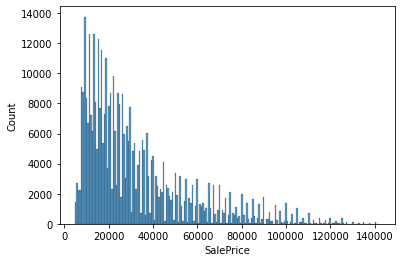

In [233]:
# Plotting a histogram
sns.histplot(df['SalePrice'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


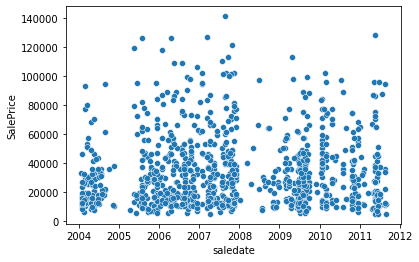

In [234]:
# Visualising the saleprice via saledate
sns.scatterplot(df['saledate'][:1000],df['SalePrice'][:1000])

## 6. Data Preprocessing

### SaleDate Column

**Sorting the values as per SaleDate Column**

In [235]:
#Sorting the value
df.sort_values(['saledate'],inplace=True, ascending=True)

In [236]:
df['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [237]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


**Add datetime parameter for `saledate`column**

In [238]:
df['saleYear'] = df.saledate.dt.year
df['saleMonth'] = df.saledate.dt.month
df['saleDay'] = df.saledate.dt.day
df['saleDayofWeek'] = df.saledate.dt.dayofweek
df['saleDayofYear'] = df.saledate.dt.dayofyear

In [239]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [240]:
# Now we have enriched our dataframe with date time features, we can remove it
df.drop(['saledate'],axis=1, inplace=True)

In [241]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### State Column

In [242]:
# Check the data of State column
df['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Processing on columns which contain strings

In [243]:
# Finding columns which contain strings
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [244]:
df['UsageBand'].value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

In [245]:
# converting objects to categories
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [247]:
#Retrieving the category through codes
df['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Dropping the ID columns (not useful)

In [248]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [249]:
df.drop(['SalesID','MachineID','ModelID','auctioneerID'],axis=1,inplace=True)

In [250]:
df.shape

(412698, 53)

## Fill Missing Values

### Fill Missing Numerical Values

In [251]:
#Finding the features that have numerical values
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalePrice
datasource
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [252]:
#Check for which numeric columns have null values
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [253]:
#Fill numeric rows with median
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [254]:
df.shape

(412698, 53)

In [255]:
#Checking again for which numeric columns have null values
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### Fill Missing Categorical Values

In [256]:
#Check for categorical values
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [257]:
#Turn categorical variables into numbers and fill missing
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn categories into numbers and add +1 (It is done because pandas categorise missing values as -1, we want it to be 0)
        df[label] = pd.Categorical(content).codes + 1

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 412698 non-null  float64
 1   datasource                412698 non-null  int64  
 2   YearMade                  412698 non-null  int64  
 3   MachineHoursCurrentMeter  412698 non-null  float64
 4   UsageBand                 412698 non-null  int8   
 5   fiModelDesc               412698 non-null  int16  
 6   fiBaseModel               412698 non-null  int16  
 7   fiSecondaryDesc           412698 non-null  int16  
 8   fiModelSeries             412698 non-null  int8   
 9   fiModelDescriptor         412698 non-null  int16  
 10  ProductSize               412698 non-null  int8   
 11  fiProductClassDesc        412698 non-null  int8   
 12  state                     412698 non-null  int8   
 13  ProductGroup              412698 non-nu

Now that all of the data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model

## 7. Modelling

**Split data into Training and Validation**

In [269]:
df_train = df[df['saleYear'] != 2012 ]
df_valid = df[df['saleYear'] == 2012 ] 

**Split data into X & y**

In [270]:
X_train , y_train = df_train.drop('SalePrice',axis=1) , df_train['SalePrice']
X_valid , y_valid = df_valid.drop('SalePrice',axis=1) , df_valid['SalePrice']

In [271]:
X_train.shape , y_train.shape , X_valid.shape , y_valid.shape

((401125, 52), (401125,), (11573, 52), (11573,))

**Model Building**

In [223]:
from sklearn.ensemble import RandomForestRegressor

In [277]:
%%time
#n_jobs specifies how many cores of CPU to take to train model, -1 signifies all cores
model = RandomForestRegressor(n_jobs=-1)

model.fit(X_train,y_train)

CPU times: user 13min, sys: 718 ms, total: 13min 1s
Wall time: 6min 38s


In [278]:
#Training accuracy
model.score(X_train,y_train)

0.9869658659584961

**Building an Evaluation function**

In [279]:
from sklearn.metrics import mean_squared_log_error ,mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
  """
  Calculates root mean squared log error between predictions and true labels
  """
  return np.sqrt(mean_squared_log_error(y_test,y_preds))

#Create function to evaluate model on few different levels
def show_scores(model,X_train,y_train):
  train_preds = model.predict(X_train)
  scores = {"MAE ": mean_absolute_error(y_train , train_preds),
            "RMSLE ": rmsle(y_train , train_preds),
            "R^2 ": r2_score(y_train , train_preds),
            }
  return scores

In [280]:
#Training data scores
show_scores(model,X_train,y_train)

{'MAE ': 1613.1754308767863,
 'RMSLE ': 0.08688115698155593,
 'R^2 ': 0.9869658659584961}

In [281]:
#Validation data scores
show_scores(model,X_valid,y_valid)

{'MAE ': 6149.116610981965,
 'RMSLE ': 0.2544573323535719,
 'R^2 ': 0.8706390986514981}

### HyperParameter Tuning

In [282]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different Random Forest hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           }

#Instantiate RandomizedSearchCV Model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions= rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

#Fit the randomizedSearchCV Model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 74.3min finished


CPU times: user 7min 48s, sys: 7.51 s, total: 7min 55s
Wall time: 1h 17min 30s


In [283]:
#Best Parameters
rs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'n_estimators': 60}

In [285]:
#Validation data scores
show_scores(rs_model,X_valid,y_valid)

{'MAE ': 6237.378619569159,
 'RMSLE ': 0.2565414022307999,
 'R^2 ': 0.8642062406633099}

### Making Predictions on Test data

In [304]:
df_test = pd.read_csv('drive/MyDrive/Bulldozer Data/Test.csv',parse_dates=['saledate'])

In [305]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [306]:
df_test.shape

(12457, 52)

In [307]:
#Creating a copy of test dataframe before preprocessing
df_test_forpreprocessing = df_test.copy()

**Preprocessing test data in same format as train data**

In [299]:
def preprocessing_data(df):
  """
  Performs transformations on df and return transformed data
  """
  #Sorting the value
  df.sort_values(['saledate'],inplace=True, ascending=True)

  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayofWeek'] = df.saledate.dt.dayofweek
  df['saleDayofYear'] = df.saledate.dt.dayofyear

  # Now we have enriched our dataframe with date time features, we can remove it
  df.drop(['saledate'],axis=1, inplace=True)


  # converting objects to categories
  for label,content in df.items():
      if pd.api.types.is_string_dtype(content):
          df[label] = content.astype('category').cat.as_ordered()
      
  df.drop(['SalesID','MachineID','ModelID','auctioneerID'],axis=1,inplace=True)

  #Fill numeric rows with median
  for label,content in df.items():
      if pd.api.types.is_numeric_dtype(content):
          if pd.isnull(content).sum():
              #Fill missing numeric values with median
              df[label] = content.fillna(content.median())

  #Turn categorical variables into numbers and fill missing
  for label,content in df.items():
      if not pd.api.types.is_numeric_dtype(content):
          #Turn categories into numbers and add +1 (It is done because pandas categorise missing values as -1, we want it to be 0)
          df[label] = pd.Categorical(content).codes + 1

  return df

In [308]:
#Process the test data
df_test_processed = preprocessing_data(df_test_forpreprocessing)

In [309]:
df_test_processed.shape

(12457, 52)

In [310]:
#Making prediction on processed test data
test_preds = model.predict(df_test_processed)

We have made some predictions but they are not in same format as Kaggle is asking for:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [311]:
#Format predictions into same format as Kaggle
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['Sales_Price'] = test_preds

In [312]:
df_preds.head()

,SalesID,Sales_Price
0,1227829,12421.0
1,1227844,17135.0
2,1227847,22877.5
3,1227848,26000.5
4,1227863,11797.5


In [313]:
#Export prediction data
df_preds.to_csv('drive/MyDrive/Bulldozer Data/test_predictions.csv',index=False)

### Feature Importance

In [317]:
#Finding feature importance of our model
importances=model.feature_importances_

In [318]:
len(importances)

52

In [321]:
#Helper function for plotting feature importance (new trick to create dataframe)
def plot_features(columns,importances,n):
  df = (pd.DataFrame({"Features":columns,
                      "Feature_importances":importances})
        .sort_values("Feature_importances",ascending=False)
        .reset_index(drop=True))
  
  #Plot the dataframe
  fig,ax = plt.subplots()
  ax.barh(df['Features'][:n], df["Feature_importances"][:n])
  ax.set_ylabel("Features")
  ax.set_ylabel("Feature Importances")
  ax.invert_yaxis()

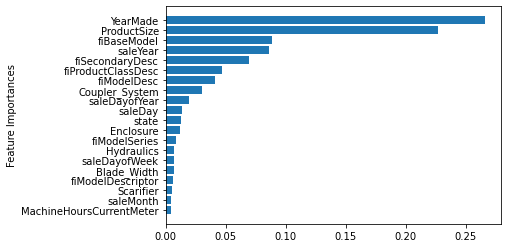

In [322]:
plot_features(X_train.columns,importances,20)

### Saving the model


In [323]:
from joblib import dump

dump(model, 'bulldozer_price_model.joblib')

['bulldozer_price_model.joblib']